Name: Võ Hồng Quân 
<br>
Student ID: 22134012

Epoch 0, Loss: 1.0140
Epoch 50, Loss: 0.3138
Epoch 100, Loss: 0.0844
Epoch 150, Loss: 0.0421
Epoch 200, Loss: 0.0380
Epoch 250, Loss: 0.0378
Epoch 300, Loss: 0.0378
Epoch 350, Loss: 0.0378
Epoch 400, Loss: 0.0378
Epoch 450, Loss: 0.0378


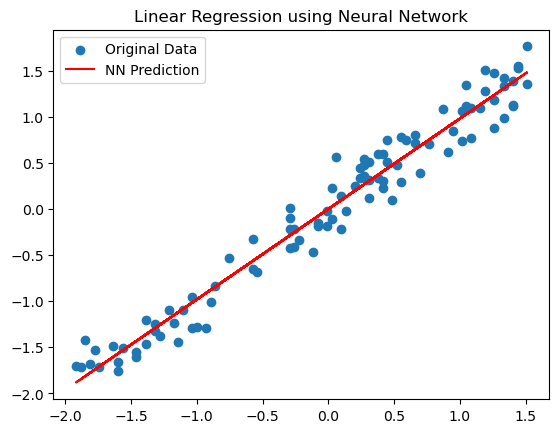

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the new dataset (ex1.csv)
data = pd.read_csv('ex1.csv')   # Renaming for compatibility
X = data['x'].values.reshape(-1, 1)  # Input feature
y = data['y'].values.reshape(-1, 1)  # Target variable

# Normalize data for better performance in NN
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Update the dense layer to handle single feature input for linear regression
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)


# Mean Squared Error loss for regression tasks
class Loss_MeanSquaredError:
    def forward(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        self.dinputs = -2 * (y_true - dvalues) / samples


# Define the Adam optimizer again
class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentums
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Corrected momentums
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update cache with squared gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        # Corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Update parameters
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

# Retry training
dense1 = Layer_Dense(1, 1)  # Single input, single output for linear regression
loss_function = Loss_MeanSquaredError()
optimizer = Optimizer_Adam(learning_rate=0.01)

# Training loop
epochs = 500
for epoch in range(epochs):
    # Forward pass
    dense1.forward(X)
    loss = loss_function.forward(dense1.output, y)

    # Backward pass
    loss_function.backward(dense1.output, y)
    dense1.backward(loss_function.dinputs)

    # Update weights
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.post_update_params()

    # Print loss every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot results
plt.scatter(X, y, label="Original Data")
plt.plot(X, dense1.output, color='r', label="NN Prediction")
plt.legend()
plt.title("Linear Regression using Neural Network")
plt.show()

